DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

# Import data into Python environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comcast = pd.read_csv("C:\\Users\\Suraj Jain\\ML_python\\comcast\\Comcast_telecom_complaints_data.csv")

In [3]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
comcast.shape

(2224, 11)

# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [6]:
comhis=comcast.groupby(["Date","Customer Complaint"]).sum()
#import matplotlib.pyplot as plt
#comhis.p

In [7]:
#create new dateindex
comcast['date_index']=comcast["Date_month_year"]+" "+comcast["Time"]
comcast["date_index"] = pd.to_datetime(comcast["date_index"])
comcast["Date_month_year"] = pd.to_datetime(comcast["Date_month_year"])

In [8]:
comcast.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

In [9]:
#
comcast["Date_month_year"].value_counts()[:5]

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
Name: Date_month_year, dtype: int64

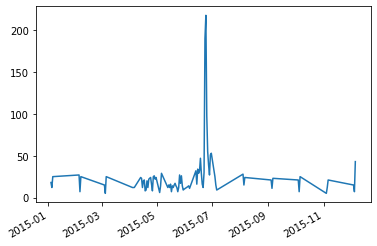

In [10]:
#plot monthly basis
comcast["Date_month_year"].value_counts().plot();
plt.savefig('Monthly.png')

In [11]:
#plot daily basis
f = comcast.groupby(pd.Grouper("Date")).size()
f

Date
22-04-15    22
04-08-15    28
18-04-15     8
05-07-15    15
26-05-15    27
            ..
04-05-15     6
05-09-15    11
04-04-15    12
14-05-15    15
05-03-15     5
Length: 91, dtype: int64

# 

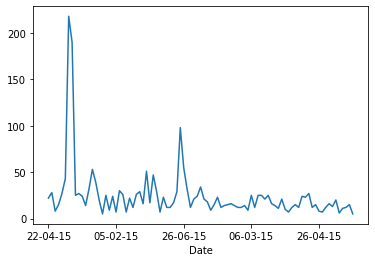

In [12]:
#plot daily basis
comcast.groupby(pd.Grouper("Date")).size().plot()

# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [13]:
comcast["Received Via"].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

# Provide a table with the frequency of complaint types.

In [14]:
comcast["Status"].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [15]:
comcast["New_Status"] = comcast["Status"]

In [16]:
comcast.loc[comcast.Status.isin(["Open","Pending"]),"New_Status"] = "open"

In [17]:
comcast.loc[comcast.Status.isin(["Closed","Solved"]),"New_Status"] = "close"

In [18]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,close
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,close
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,close
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,close


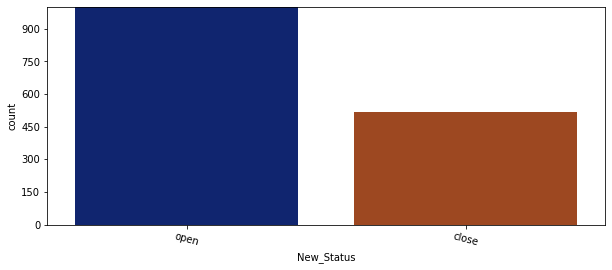

In [19]:
#if i want to plot open and closed bar chart
plt.figure(figsize=(10,4))
sns.countplot(x=comcast['New_Status'],palette='dark')
plt.xticks(ticks=np.arange(2),labels=['open','close'],rotation=-15)
plt.yticks(np.arange(0,1000,150))
plt.ylim(0,1000)
plt.show()

# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [20]:
#create a new variable and count open close
Status_complaint=comcast.groupby(["State","New_Status"]).size().unstack().fillna(0)
Status_complaint

New_Status,close,open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


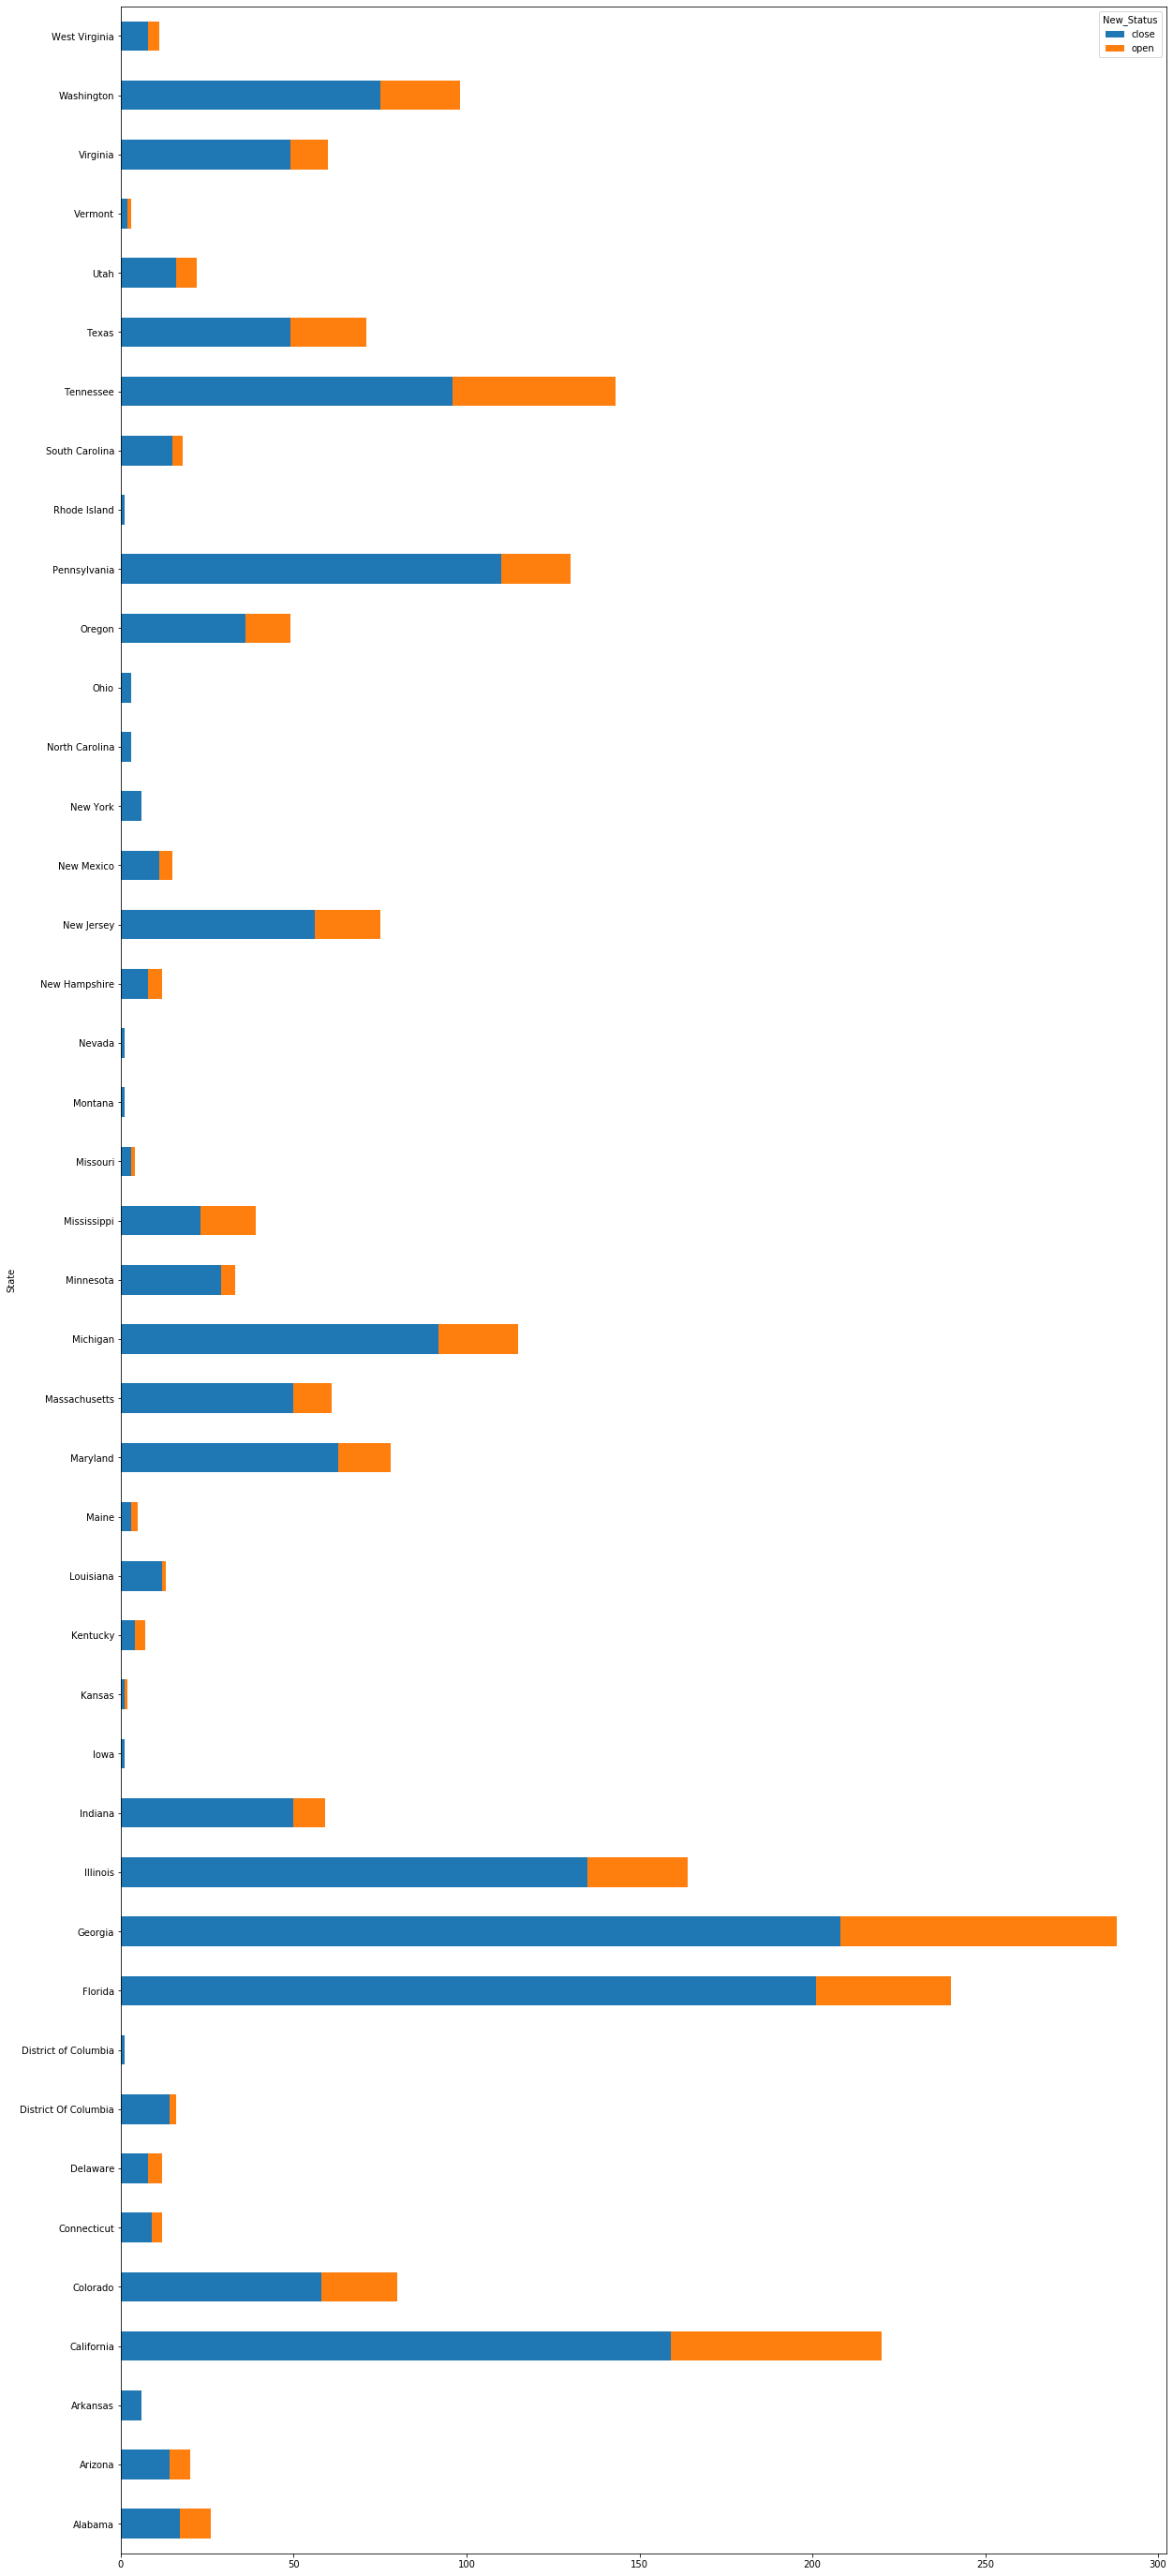

In [21]:
#plot stacked bar chart
Status_complaint.plot(kind="barh", figsize=(20,50), stacked=True)

# Which state has the maximum complaints  

In [22]:
comcast.State[comcast.New_Status == "open"].value_counts()

#name of state
#comcast.State[comcast.State[comcast.New_Status == "open"].value_counts().max()]

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Alabama                  9
Indiana                  9
Utah                     6
Arizona                  6
Minnesota                4
Delaware                 4
New Hampshire            4
New Mexico               4
Connecticut              3
Kentucky                 3
West Virginia            3
South Carolina           3
Maine                    2
District Of Columbia     2
Kansas                   1
Vermont                  1
Missouri                 1
Louisiana                1
Name: State, dtype: int64

In [23]:
#total number of complaints in a state
comcast.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).max()


State    West Virginia
Count              288
dtype: object

# Which state has the highest percentage of unresolved complaints

In [24]:
len(comcast.New_Status)

2224

In [25]:
(comcast.State[comcast.New_Status == "open"].value_counts()/len(comcast.New_Status))*100

Georgia                 3.597122
California              2.742806
Tennessee               2.113309
Florida                 1.753597
Illinois                1.303957
Michigan                1.034173
Washington              1.034173
Texas                   0.989209
Colorado                0.989209
Pennsylvania            0.899281
New Jersey              0.854317
Mississippi             0.719424
Maryland                0.674460
Oregon                  0.584532
Massachusetts           0.494604
Virginia                0.494604
Alabama                 0.404676
Indiana                 0.404676
Utah                    0.269784
Arizona                 0.269784
Minnesota               0.179856
Delaware                0.179856
New Hampshire           0.179856
New Mexico              0.179856
Connecticut             0.134892
Kentucky                0.134892
West Virginia           0.134892
South Carolina          0.134892
Maine                   0.089928
District Of Columbia    0.089928
Kansas    

### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [26]:
#resolved percentage
(comcast.New_Status[comcast.New_Status == "close"].value_counts()/len(comcast.New_Status))*100

close    76.753597
Name: New_Status, dtype: float64

In [27]:
#stats of uresolved
(comcast.New_Status[comcast.New_Status=="open"].value_counts()/len(comcast.New_Status))*100

open    23.246403
Name: New_Status, dtype: float64